# Classification with regularized logistic regression

Using the starter code provided in the problem:

In [1]:
# python

import numpy as np
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from sklearn . datasets import make_classification
import matplotlib.pyplot as plt
import time
X , y = make_classification ( n_features =2 ,
n_redundant =0 ,
n_informative =2 ,
random_state =1 ,
n_clusters_per_class =1)
rng = np . random . RandomState (2)
X += 2 * rng . uniform ( size = X . shape )
linearly_separable = (X , y )
X = StandardScaler (). fit_transform ( X )
X_train , X_test , y_train , y_test = \
train_test_split (X , y , test_size =.4 , random_state =42)

def lossFunction(w, x, y, lam):
    loss = np.log(1 + np.exp(-y*np.dot(x, w))) + lam*np.linalg.norm(w)
    loss = np.sum(loss)
    misclass = 1 / (1 + np.exp(y*np.dot(x, w)))
    grad = np.dot(np.multiply(misclass, y), x)
    return loss, grad


def gradientDescent(X ,y , w , eta , lam , tolerance, testx, testy):
    rows, cols = X.shape
    LLs = []
    totalLLs = []
    testLLs = []
    iters = [0]
    dis = 0
    while True: 
        i = np.random.choice(range(rows))
        x1 = X[i]
        y1 = y[i]
        loss, grad = lossFunction(w, x1, y1, lam)
        LLs.append(loss)
        w = w * (1 - 2 * lam * etat) + etat * grad
        totalloss, totgrad = lossFunction(w, X, y, lam)
        testloss, testgrad = lossFunction(w, X_test, y_test, lam)
        totalLLs.append(totalloss)
        testLLs.append(testloss)
        if np.linalg.norm(totgrad) < tolerance or dis == 1000:
            break
        dis = dis + 1
        iters.append(dis)
    return w, iters, LLs, totalLLs, testLLs
    

etat = 0.01
lam = 0.1
w = np.ones(2)
iters = 0

start_time = time.time()
w, iters, LLs, totalLLs, testLLs = gradientDescent(X_train, y_train, w, etat, lam, 1, X_test, y_test)
end_time = time.time()
time_elapsed = end_time - start_time
print("Time Lapsed = {0} seconds".format(time_elapsed))



Time Lapsed = 0.34784793853759766 seconds


Training is done quite quickly, with the regression reaching convergence in less than a second. 

Text(0.5, 1.0, 'Log loss on each training sample')

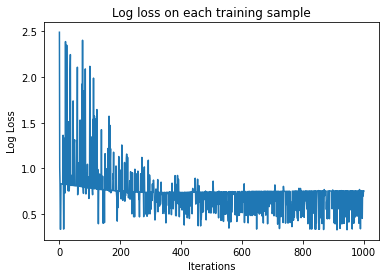

In [2]:
plt.figure()
plt.plot(iters, LLs)
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log loss on each training sample')

The plot above shows the log loss on each training sample that is used for the optimization step. The loss varies widely as each sample may have a different loss. While the losses start high (around 2) we see that they drop below one and remain low as the number of iterations approaches 1000.

Text(0.5, 1.0, 'Training Accuracy')

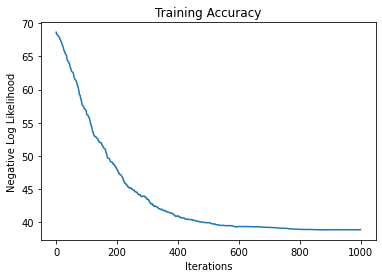

In [3]:

plt.figure()
plt.plot(iters, totalLLs)
plt.xlabel('Iterations')
plt.ylabel('Negative Log Likelihood')
plt.title('Training Accuracy')


The plot above shows us the negative log likelihood during training when the model is evaluated on the entire training set. The algorithm converges monotonically.

Text(0.5, 1.0, 'Testing Accuracy')

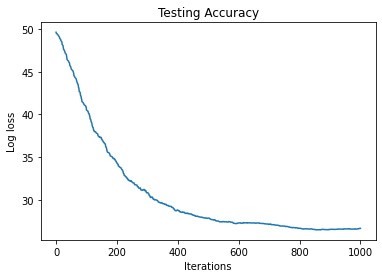

In [4]:
plt.figure()
plt.plot(iters, testLLs)
plt.xlabel('Iterations')
plt.ylabel('Log loss')
plt.title('Testing Accuracy')

The plot above shows the accuracy of the model during training when evaluated on the testing data. As we can see, the loss on the testing data is minimized as training goes on. 

# Logistic regression in phase space

Next, we calculate the decision boundary by using the closed form expression for the probability of a label being one and we set it equal to 0.5, since according to our model, anything on one side of this line is more likely to have label 1 and anything on the other side is more likely to have label 0. If the probability is given by $ P(Y = 1 | x, w) = \frac{1}{1 + \exp(-w^T x)} = 0.5$ then $w^T x = 0 $ so $x_2 = -\frac{w_1}{w_2} x_1$ is the line which represents the decision boundary. 

Text(0.5, 1.0, 'Logistic regression with regularization')

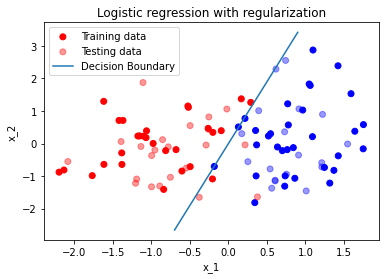

In [5]:
plt.figure()
x_min , x_max = X_train[: , 0].min() - .5 , X_train[: , 0].max() + .5
y_min , y_max = X_train[: , 1].min() - .5 , X_train[: , 1].max() + .5
h = .02 # step size in the mesh
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,
np . arange ( y_min , y_max , h ))
# plot the dataset
cm = plt . cm . RdBu
# Plot the training points
plt.scatter( X_train[: , 0] , X_train[: , 1] , c = y_train, cmap = 'bwr',label='Training data')
# and test points
plt.scatter( X_test [: , 0] , X_test [: , 1] , c = y_test, alpha = 0.4, cmap = 'bwr', label='Testing data')
# ADD YOUR CODE TO PLOT THE DECISION BOUNDARY
x1 = np.linspace(-0.7,0.9, num = 20)
x2 = - x1 * w[0] / w[1]
plt.plot(x1,x2, label='Decision Boundary')
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Logistic regression with regularization')


The above plot shows the data in phase space along with the decision boundary represented by the logistic model. Though the decision boundary may look skewed, it represents a good partitioning of the training data. One can see that all the blue training data is to the right of the decision boundary and all but one point in the red training data is to the left of the boundary.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c048c68-6435-40e1-a90d-a7c1397ff166' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>